### Exercise: Load and Preview the California Housing Dataset

**Instructions:**

1. Read the dataset file `california_housing_train.csv` using the `pandas` library.
2. Print the first 5 rows of the dataset.

**Expected Output:**

The first 5 rows of the dataset should be displayed, showing columns like `longitude`, `latitude`, `housing_median_age`, etc.


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Exercise: Separate Features (X) and Target (y)

**Instructions:**

1. Use the California housing dataset loaded in the previous step.
2. Define `X` as the feature matrix by removing the target column.
3. Define `y` as the target vector. The target column is usually named `median_house_value`.

**Expected Output:**

- `X` should be a DataFrame containing all columns **except** `median_house_value`.
- `y` should be a Series containing only the `median_house_value` column.


In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

Print the first 5 rows of the x.

In [ ]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [ ]:
y

,median_house_value
0,344700.0
1,176500.0
2,270500.0
3,330000.0
4,81700.0
...,...
2995,225000.0
2996,237200.0
2997,62000.0
2998,162500.0


### Exercise: Print the Shape of Feature Matrix X

**Instructions:**

1. Using the feature matrix `X` defined earlier, print its shape (number of rows and columns).

**Expected Output:**

- The output should display a tuple showing the dimensions of `X`, for example `(17000, 8)` indicating 17,000 rows and 8 columns.


In [ ]:
X.shape

(3000, 8)

### Exercise: Split the Dataset into Training and Test Sets

**Instructions:**

1. Split the dataset into training and test sets.
2. Use 20% of the data as the test set.
3. Use `train_test_split` from `sklearn.model_selection` for splitting.

**Expected Output:**

- You should have four variables: `X_train`, `X_test`, `y_train`, and `y_test`.
- The test set should contain approximately 20% of the samples.


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 42)

### Exercise: Define the Device for PyTorch

**Instructions:**

1. Import `torch` library.
2. Define a variable `device` that uses GPU if available, otherwise CPU.
3. Print the selected device.

**Expected Output:**

- The output should show either `cuda` (if GPU is available) or `cpu`.



In [ ]:
import torch

In [16]:
torch.cuda.is_available()

True

In [17]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [18]:
device

'cuda'

### Exercise: Convert Training Data to PyTorch Tensors (with Correct Shape)

**Instructions:**

1. Convert the training feature matrix `X_train` and the target vector `y_train` to PyTorch tensors.
2. Ensure that `X_train_tensor` has data type `float32` and shape `(n_samples, n_features)`.
3. Ensure that `y_train_tensor` has shape `(n_samples, 1)` (i.e., two-dimensional).
4. Move both tensors to the appropriate `device` (CPU or GPU).

**Expected Output:**

- `X_train_tensor`: a 2D tensor of shape `[number_of_samples, number_of_features]`.
- `y_train_tensor`: a 2D tensor of shape `[number_of_samples, 1]`.


In [ ]:
n_samples = X_train.shape[0]
n_features = X_train.shape[1]

In [ ]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32, device = device ).view(n_samples, n_features)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32, device = device).view(n_samples, 1)

In [ ]:
print("Device of X_train_tensor:", X_train_tensor.device)
print("Device of X_train_tensor:", y_train_tensor.device)

Device of X_train_tensor: cuda:0
Device of X_train_tensor: cuda:0


### Exercise: Build a Neural Network Model with 3 Layers

**Instructions:**

1. Build a PyTorch neural network model.
2. The architecture should include 3 layers:
   - First layer: 5 neurons with ReLU activation
   - Second layer: 3 neurons with ReLU activation
   - Final layer: 1 neuron (no activation function)
3. Do **not** apply any activation function to the output layer.

**Expected Output:**

- A model object containing 3 layers.
- The output of the model should be a single continuous value suitable for regression.


In [ ]:
import torch.nn as nn
from torch import optim
loss_fn = nn.MSELoss()

class ManualRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features = 8,out_features = 5)
    self.fc2 = nn.Linear(5,3)
    self.fc3 = nn.Linear(3,1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)

    return x

### Exercise: Implement the Training Loop and Train the Model

**Instructions:**

1. Write a training loop to train the model for **500 epochs**.
2. Use **Mean Squared Error (MSE)** as the loss function.
3. Use an optimizer such as **SGD**.
4. In each epoch:
   - Perform a forward pass.
   - Compute the loss.
   - Perform a backward pass.
   - Update the model parameters.
5. Print the loss every 50 epochs to monitor training progress.

**Expected Output:**

- The model should train for 500 epochs.
- You should see printed loss values at regular intervals (e.g., every 50 epochs).
- The loss should generally decrease over time if the model is learning properly.


In [ ]:
model = ManualRegression().to(device)
loss_fn = nn.MSELoss()
lr = .01
optimizer = optim.SGD(model.parameters(), lr=lr)
losses = []
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_train_tensor, y_pred)
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().cpu().item())
    optimizer.zero_grad()

    if (epoch) % 50 == 0:
        print(f'Epoch: {epoch}, train_loss = {loss.item():.4f}')

Epoch: 0, train_loss = 55664050176.0000
Epoch: 50, train_loss = nan
Epoch: 100, train_loss = nan
Epoch: 150, train_loss = nan
Epoch: 200, train_loss = nan
Epoch: 250, train_loss = nan
Epoch: 300, train_loss = nan
Epoch: 350, train_loss = nan
Epoch: 400, train_loss = nan
Epoch: 450, train_loss = nan


In [ ]:
model = ManualRegression().to(device)
loss_fn = nn.MSELoss()
lr = 1
optimizer = optim.SGD(model.parameters(), lr=lr)
losses = []
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_train_tensor, y_pred)
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().cpu().item())
    optimizer.zero_grad()

    if (epoch) % 50 == 0:
        print(f'Epoch: {epoch}, train_loss = {loss.item():.4f}')

Epoch: 0, train_loss = 55888912384.0000
Epoch: 50, train_loss = nan
Epoch: 100, train_loss = nan
Epoch: 150, train_loss = nan
Epoch: 200, train_loss = nan
Epoch: 250, train_loss = nan
Epoch: 300, train_loss = nan
Epoch: 350, train_loss = nan
Epoch: 400, train_loss = nan
Epoch: 450, train_loss = nan


Exercise: Analyze the Training Behavior

**Instructions:**

After training the model for 500 epochs, observe the printed loss values over time.

You are expected to see a decreasing trend in the loss, indicating that the model is learning and updating its parameters correctly.

However, you might notice that:

- The loss is **not decreasing significantly**, or
- The loss remains **almost constant**, or
- The loss shows **unexpected fluctuations**.

This suggests that **learning may not be happening as expected**, even though the training loop and model definition seem correct.

**Question:**

What could be the reasons for the model not learning properly?

- The code logic appears to be correct.
- The model runs without errors.
- The loss function and optimizer are standard.

**Hint:** Think about the nature and scale of the input data. Neural networks are sensitive to the scale of input features. You may consider whether data **normalization or standardization** is necessary before feeding inputs into the model.

Discuss what might be going wrong and how you would investigate or fix it.


### Exercise: Manually Normalize Input Features and Target (Without sklearn)

**Instructions:**

In regression problems, it's important to normalize both the **input features (`X`)** and the **target (`y`)** to improve the stability and efficiency of training.

You will perform **standard normalization** (zero mean and unit variance) **manually**, without using any external library such as `sklearn`.

---

#### 🔹 Normalization Formula:

For each column (feature or target), apply:

$$
x_{\text{normalized}} = \frac{x - \mu}{\sigma}
$$

where:

- \( x \): original value  
- \( \mu \): mean of the column (computed from `X_train` or `y_train`)  
- \( \sigma \): standard deviation of the column (computed from `X_train` or `y_train`)  

---

#### 🔹 Your Tasks:

1. Compute the mean and standard deviation of each feature column in `X_train`.
2. Normalize `X_train` using these values.
3. Normalize `X_test` using the **same** mean and std from `X_train`.
4. Compute the mean and std of `y_train`, then normalize it.
5. Apply the same transformation to `y_test`.
6. After normalization, convert all the data to PyTorch tensors and move them to the appropriate `device`.

---

#### ⚠️ Notes:

- Do **not** use `sklearn.preprocessing.StandardScaler` or any similar library.
- Normalization must be done **before converting the data to PyTorch tensors**.
- Keep track of the mean and std values for `y` — they will be needed later to **de-normalize predictions** (e.g., for evaluation or visualization).
- Without proper normalization, the model may fail to learn effectively, especially if feature scales differ significantly.

---

**Expected Output:**

- Each column in `X_train` should have a mean close to 0 and standard deviation close to 1.
- The same applies to `y_train`.
- `X_test` and `y_test` should be transformed using `X_train` and `y_train` statistics.
- Model training loss should now decrease more consistently compared to training without normalization.



In [ ]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

y_mean = y.mean()
y_std = y.std()

In [ ]:
X_normalized = (X - X_mean) / X_std

y_normalized = (y - y_mean) / y_std

In [ ]:
X_tensor = torch.FloatTensor(X_normalized.values)
y_tensor = torch.FloatTensor(y_normalized.values)

In [ ]:
x_{\text{normalized}} = \frac{x - \mu}{\sigma}

### Exercise: Convert Normalized Data to Tensors, Train the Model, and Plot Loss

**Instructions:**

1. Convert the normalized `X_train`, `X_test`, `y_train`, and `y_test` data to PyTorch tensors.
2. Move the tensors to the appropriate device (CPU or GPU).
3. Train the model using the normalized training data.
4. During training, record the loss value for each epoch.
5. After training, plot the training loss curve over all epochs to visualize the learning progress.
6. Analyze the plot to confirm that the loss decreases smoothly over time, indicating successful training.

**Expected Output:**

- Tensors for all datasets on the correct device.
- A training loss plot showing a generally decreasing trend.
- Confirmation that normalization helped stabilize and improve training.


In [39]:
import pandas as pd

In [40]:
df = pd.read_csv("/content/sample_data/california_housing_test.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [41]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [42]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375


In [44]:
X.shape

(3000, 8)

In [45]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)

y_mean = y.mean()
y_std = y.std()

In [8]:
X_normalized = (X - X_mean) / X_std

y_normalized = (y - y_mean) / y_std

In [46]:
from sklearn.model_selection import train_test_split
X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
import torch
X_train_tensor = torch.tensor(X_train_normalized.values, dtype=torch.float32, device = device)
X_test_tensor = torch.tensor(X_test_normalized.values, dtype=torch.float32, device = device)
y_train_tensor = torch.tensor(y_train_normalized.values, dtype=torch.float32, device = device)
y_test_tensor = torch.tensor(y_test_normalized.values, dtype=torch.float32, device = device)

In [82]:
import torch
losses = []
epoch = 500
lr = .001

y_train_tensor = y_train_tensor.view(-1, 1)

w = torch.randn(8, 1, requires_grad=True, device = device)
b = torch.randn(1, requires_grad=True, device = device)
for i in range(epoch):
  y_pred = torch.matmul(X_train_tensor, w) + b

  error = y_pred - y_train_tensor
  loss = (error ** 2).mean()

  loss.backward()
  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

  losses.append(loss.detach().cpu().item())
  w.grad.zero_()
  b.grad.zero_()

In [49]:
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)

Shape of X_train_tensor: torch.Size([2400, 8])
Shape of y_train_tensor: torch.Size([2400, 1])


### Exercise: Increase Model Complexity and Experiment with Learning Rates

**Instructions:**

1. Modify your neural network model to make it more complex by:
   - Increasing the number of layers (e.g., 4 or 5 layers).
   - Increasing the number of neurons in each layer (e.g., 64, 32, 16, 8, 1).
   - Use ReLU activation in all layers except the last.
2. Train the model with **different learning rates** (e.g., 0.01, 0.001, 0.0001).
3. For each learning rate:
   - Train the model for the same number of epochs.
   - Record the training loss over epochs.
4. Compare and analyze the results to determine how learning rate affects the training process and final performance.
5. Optionally, plot the training loss curves for different learning rates on the same graph for better comparison.

**Expected Output:**

- Multiple trained models with varying learning rates.
- Training loss plots showing how different learning rates impact convergence speed and stability.
- An analysis explaining which learning rate works best and why.


In [84]:
len(losses)

500

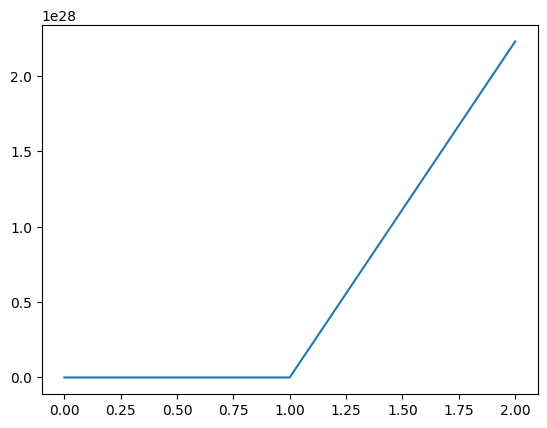

In [83]:
import matplotlib.pyplot as plt
plt.plot(range(epoch), losses)
plt.show()